<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()


**Upload files into Colaboratory**

In [3]:
#uploaded = files.upload()

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/airquality.csv', index_col=0)
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head(25))

          X1   X2       X3       X4       X5
D1   1360.00  150  1045.50  1056.25  1692.00
D2   1292.25  112   954.75  1173.75  1558.75
D3   1402.00   88   939.25  1140.00  1554.50
D4   1375.50   80   948.25  1092.00  1583.75
D5   1272.25   51   835.50  1205.00  1490.00
D6   1197.00   38   750.25  1336.50  1393.00
D7    847.25    7   501.25  1894.50  1154.75
D8   1136.25   31   672.00  1453.25  1332.75
D9   1051.75   16   553.25  1738.25  1221.25
D10  1144.00   29   667.00  1489.75  1339.00
D11  1011.00   14   526.75  1817.50  1196.75
D12  1094.00   24   608.50  1579.00  1276.00
D13  1009.75   19   560.75  1705.00  1234.75
D14  1333.25   64   899.75  1136.00  1517.00
D15  1351.00   87   960.25  1079.00  1582.75
D16  1233.25   77   827.25  1218.00  1445.75
D17  1178.75   43   762.00  1327.50  1361.75
D18  1236.00   61   774.25  1301.25  1401.25
D19  1285.50   63   868.50  1162.25  1536.75
D20  1371.00  164  1033.50   983.25  1730.25
D21  1291.75   95   911.50  1102.50  1590.75
D22  1383.

In [6]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data

In [7]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, D1 to D43
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      34 non-null     float64
 1   X2      34 non-null     float64
 2   X3      34 non-null     float64
 3   X4      34 non-null     float64
 4   X5      34 non-null     float64
dtypes: float64(5)
memory usage: 1.6+ KB


**Observations and variables**

In [8]:
observations = list(df.index)
variables = list(df.columns)

**Data Visualisation**

<Axes: >

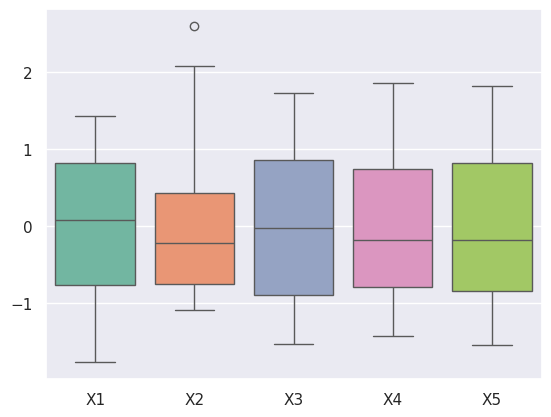

In [9]:
sns.boxplot(data=df, orient="v", palette="Set2")

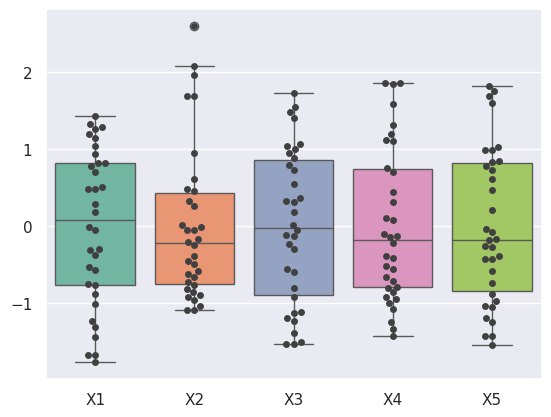

In [ ]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25")

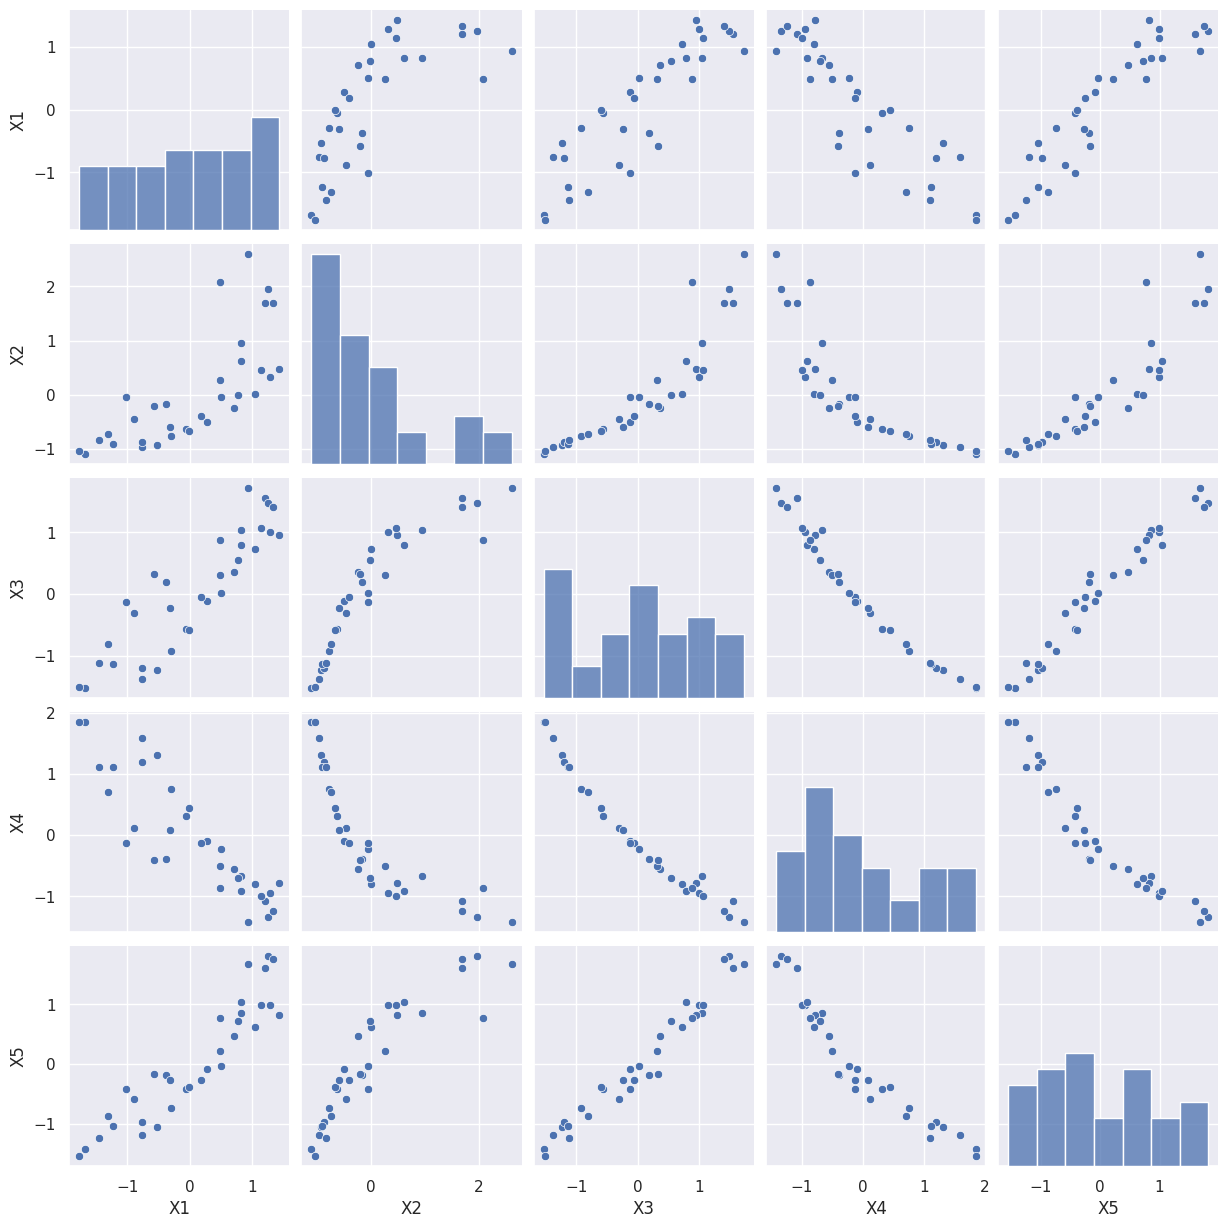

In [ ]:
#pairplot
sns.pairplot(df)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

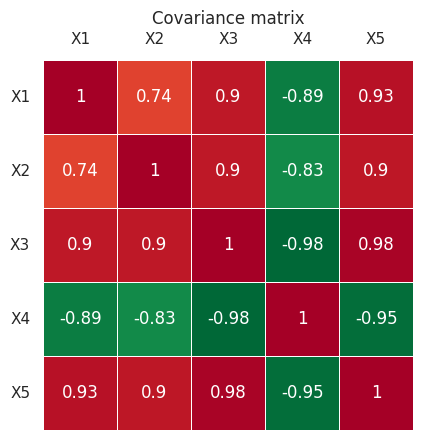

In [ ]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

**Principal component analysis**

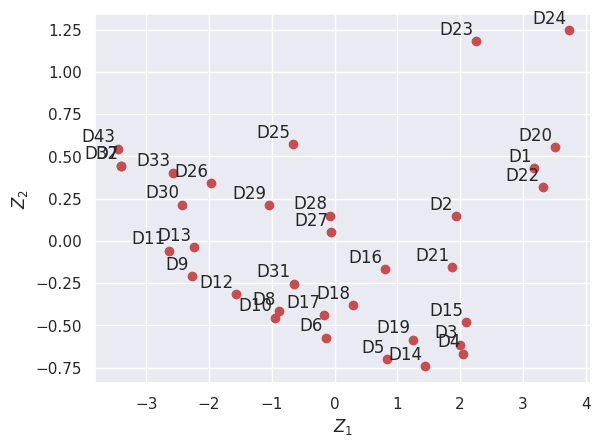

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

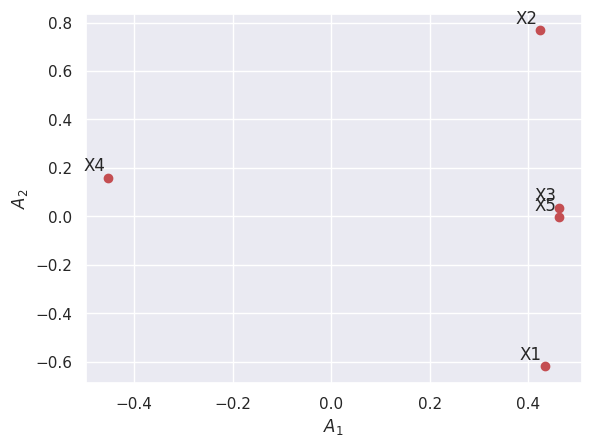

In [ ]:
A = pca.components_.T
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


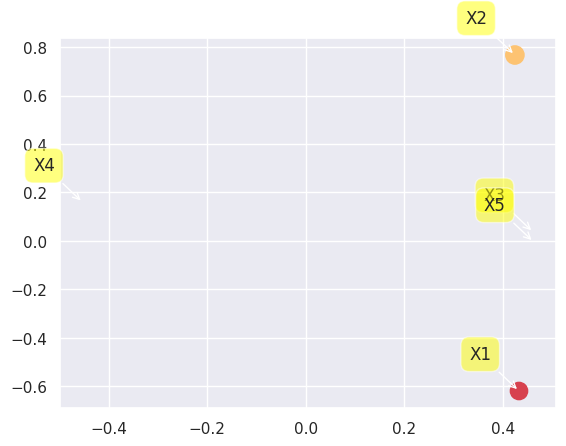

In [ ]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

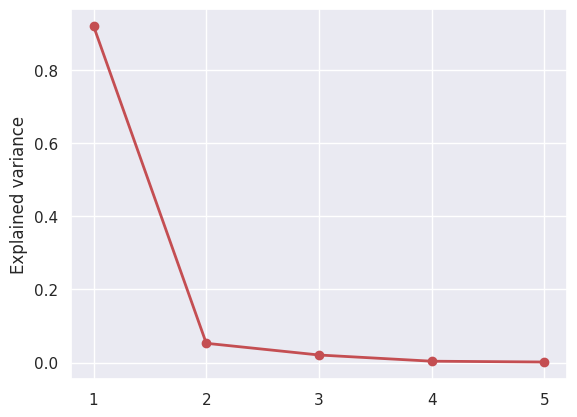

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

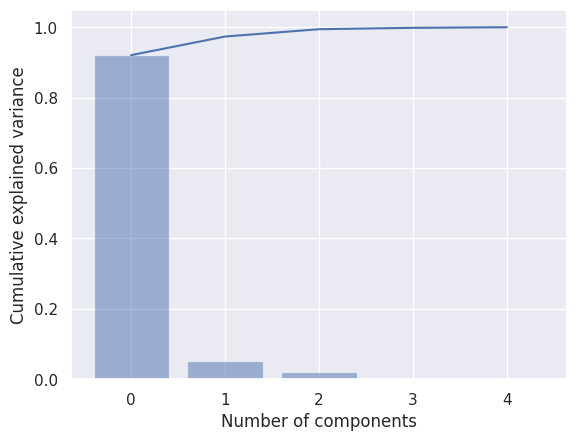

In [ ]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

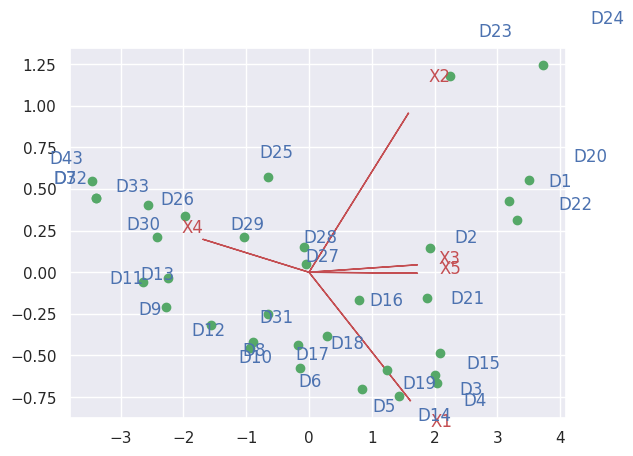

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Principal components**

Text(0.5, 1.0, 'Principal components')

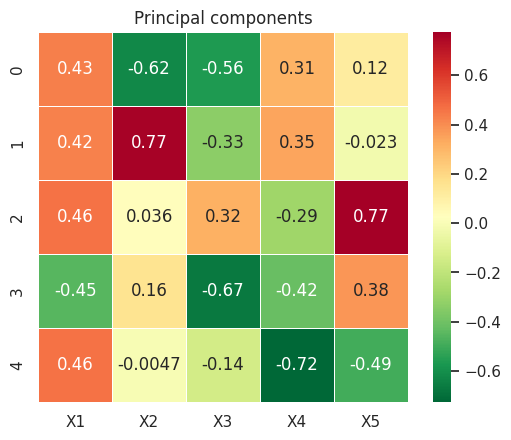

In [ ]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')